In this problem, you need to train a Hopfield network using the attached image. Use the attached training image to train your network and then evaluate its performance employing the attached test image. To this end, you need to complete each cell step by step.

You have to submit the final saved image as well as the completed notebook. 


In [2]:
import numpy as np
import random
import PIL
from PIL import Image
import os
import re
from google.colab.patches import cv2_imshow 
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd drive/MyDrive/NN_HW3

/content/drive/MyDrive/NN_HW3


In [5]:
#Convert a matrix to a vector
def mat2vec(x):
  tmp1 = list()
  for i in range(len(x)):
    for j in range(len(x[i])):
      tmp1.append(x[i][j])

#### Implement your code ###
 
  return tmp1

In [6]:
def create_W(x):
  """  
Create a square matrix with the same size as the input size.
Note 1: The weight matrix must be symmetric
Tip 1: For row i and column j, while i != j, place the value x [i] * x [j] in the weight matrix w [i, j]
Tip 2: For row i and column j, while i=j, put the value 0 in the weight matrix w [i, j]
  """
#### Impelement your code ### 
  lent = len(x)
  w = [[ 0 for j in range(lent)]for i in range(lent)]  
  for i in range(lent):
    for j in range(lent):
      if i != j :
        w[i][j] = x[i] * x[j]
      



  return w

In [7]:
#Read an image file and convert it to a pattern of the image
def readImg2array(file,size, threshold= 145):
    img = Image.open(file).convert(mode="L")
    img= img.resize(size)
    #img.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(img,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float)

    """
    Set the value to 1 for each pixel value with the larger than the threshold,
    and Set the value to -1 for each image pixel with a value of 0.



    """
    #### Implement your code ###
    x[imgArray>threshold] = 1
    x[x==0] = -1

    return x

In [8]:
#Convert a numpy array to an image file like Jpeg
def array2img(data, outFile = None):

    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

In [9]:
#Update the test input pattern (y_vec) based on the weight matrix
def update(w,y_vec,theta=0.5,time=100):


#### Impelement your code ###
  for i in range(time):
      random1 = random.randint(0,len(y_vec)-1)
      result = np.dot(w[random1][:],y_vec) - theta
      if result > 0:
        y_vec[random1] = 1
      else:
        y_vec[random1] = -1

  return y_vec

In [10]:

def hopfield(theta=0.5, time=1000, size=(100,100),threshold=60):

# """
# # Using the built-in functions, Do the following steps:
# # 1- Read the input image and extract its pattern
# # 2. Convert the obtained pattern into a vector
# # 3- Make a weight matrix based on the vector of the previous step
# # 4- Read the test image and extract its pattern
# # 5- Convert the test pattern into a vector and give it as the input of the update function along with the built-in weight matrix.

# # """


#### Impelement your code ###
   train = readImg2array("/content/drive/MyDrive/NN_HW3/Code/train.jpg", size, threshold) 
   vector1 = mat2vec(train)  
   weight1 = create_W(vector1)
   test =  readImg2array("/content/drive/MyDrive/NN_HW3/Code/test.jpg", size, threshold) 
   y_vec = mat2vec(test)  
   y_vec_after = update(weight1,y_vec,theta,time)

   y_vec_after2 = np.array(y_vec_after).reshape(test.shape)
   after_img = array2img(y_vec_after2,outFile=None)
   after_img.save("result.jpg")
   after_img.show()

   img = cv.imread('/content/drive/MyDrive/NN_HW3/result.jpg')
   cv2_imshow(img)
        

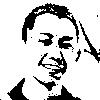

In [15]:
hopfield( theta=0.5,time=40000,size=(100,100),threshold=60)
